# Clase 12 - Distribución uniforme de números aleatorios en un rango finito

In [1]:
import numpy as np
from scipy import stats
from IPython.display import Image
import matplotlib.pyplot as plt

In [2]:
plt.style.use('seaborn-poster')

# Generador de números aleatorios LCG

Consideremos un generador de números aleatorios basado en la relación de recurrencia

\begin{equation*}
I_{j+1}=a I_{j}+c \quad(\bmod m)
\end{equation*}

con $c=1$, $m=9$ y $a=4$.

In [3]:
I = np.zeros(50,int)
index = np.zeros(50)
index[0] = 1
I[0] = 1
c = 1
m = 9
a = 4
for i in range(1,50):
    index[i] = i
    I[i] = (a*I[i-1] + c) % m

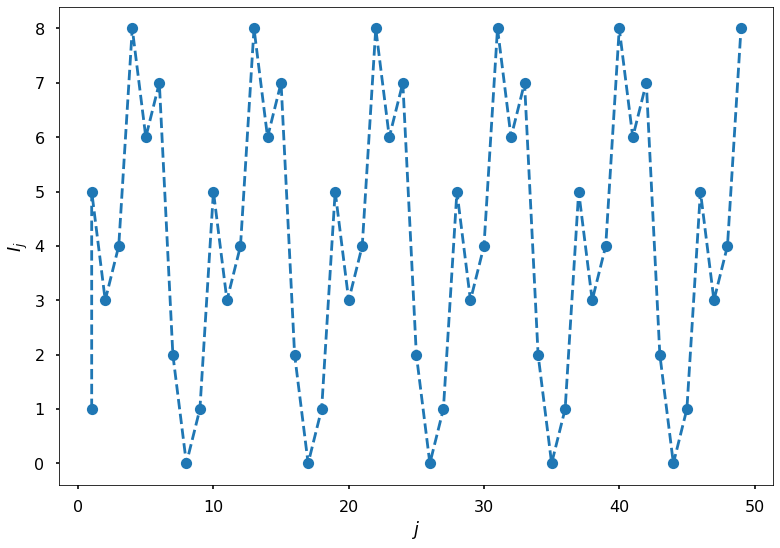

In [4]:
plt.plot(index,I,marker='o',ls='--')
plt.ylabel(r'$I_j$')
plt.xlabel(r'$j$');

Probemos ahora el generador LCG llamado RANDU

In [5]:
N = 100000
I = np.zeros(N,int)
index = np.zeros(N)
index[0] = 1
I[0] = 1
c = 0
m = 2**31
a = 65539
for i in range(1,N):
    index[i] = i
    I[i] = (a*I[i-1] + c) % m

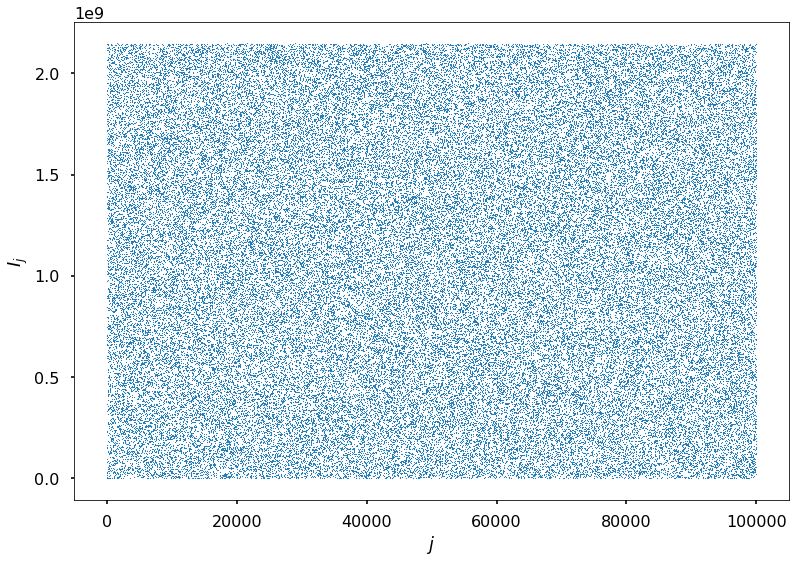

In [6]:
plt.scatter(index,I,s=0.4)
plt.ylabel(r'$I_j$')
plt.xlabel(r'$j$');

In [7]:
from mpl_toolkits.mplot3d import Axes3D

Generamos una secuencia de tres coordenadas $(x,y,z)$ aleatorias y grafiquemos. Intente rotar la figura para ver que se forman planos que contienen estos números "aleatorios". Este es uno de los principales problemas de este generador de números aleatorios, el cual no debe ser usado para aplicaciones serias.

In [8]:
x = np.zeros(N)
y = np.zeros(N)
z = np.zeros(N)

I0 = 1
c = 0
m = 2**31
a = 65539
for i in range(1,N):
    I = (a*I0 + c) % m
    x[i] = I
    I0 = I
    I = (a*I0 + c) % m
    y[i] = I
    I0 = I
    I = (a*I0 + c) % m
    z[i] = I
    I0 = I

<IPython.core.display.Javascript object>


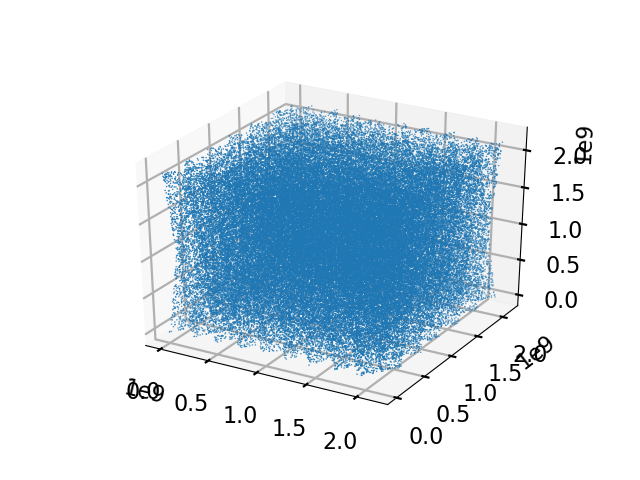

In [9]:
%matplotlib notebook
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x, y, z, s=0.4);

Ahora usemos el generador de números aleatorios de $\mathit{numpy}$. Elijamos dos semillas $\mathit{seed}$ para el generador de números aleatorios de manera de obtener siempre los mismos gráficos. Esta rutina es descrita en https://numpy.org/doc/stable/reference/random/index.html

In [10]:
%matplotlib inline
plt.style.use('seaborn-poster')
np.random.seed(4664)
samples1 = np.random.uniform(-2,2,20000)
index1 = np.zeros(len(samples1))
for i in range(len(samples1)):
    index1[i] = i

In [11]:
np.random.seed(235637)
samples2 = np.random.uniform(-2,2,20000)
index2 = np.zeros(len(samples2))
for i in range(len(samples2)):
    index2[i] = i

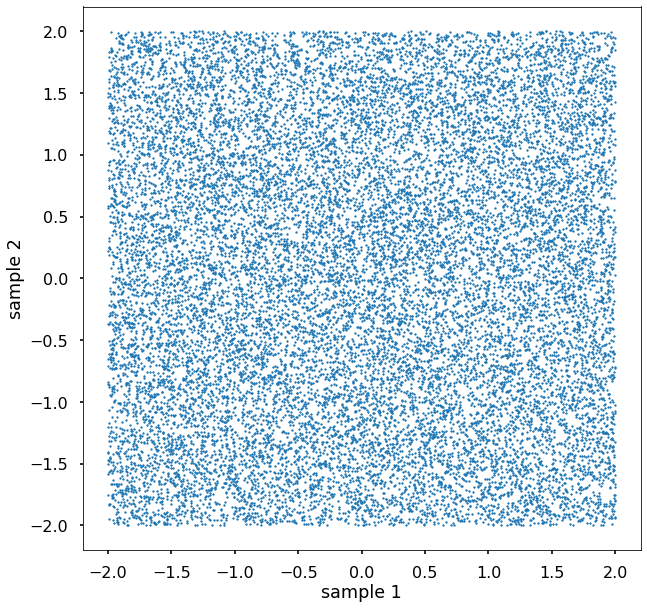

In [12]:
plt.figure(figsize=(10,10))
plt.scatter(samples1,samples2,s=3)
plt.xlabel('sample 1')
plt.ylabel('sample 2');

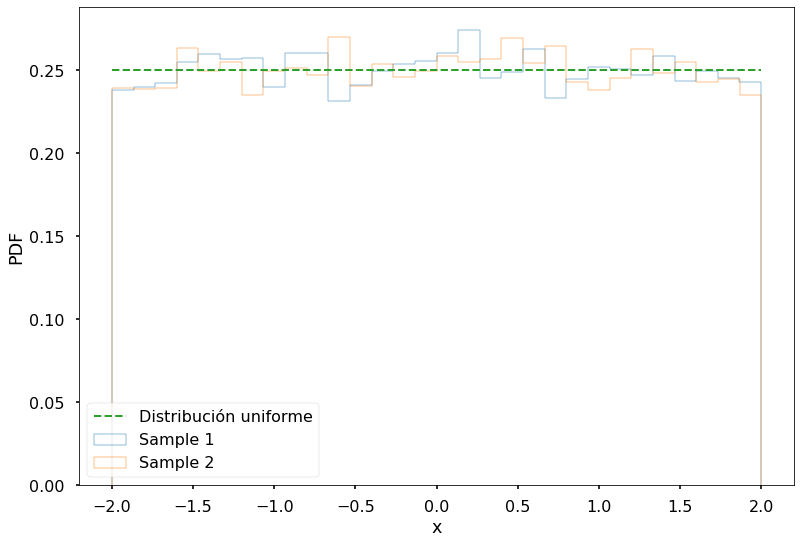

In [13]:
x = np.linspace(-2, 2, 1000)
pdf = stats.uniform.pdf(x,loc=-2,scale=4)
plt.hist(samples1, bins=30, histtype='step', label="Sample 1", density=True)
plt.hist(samples2, bins=30, histtype='step', label="Sample 2", density=True)
plt.plot(x, pdf, '--', label="Distribución uniforme",lw=2)
plt.xlabel('x')
plt.ylabel('PDF')
plt.legend(loc='best');

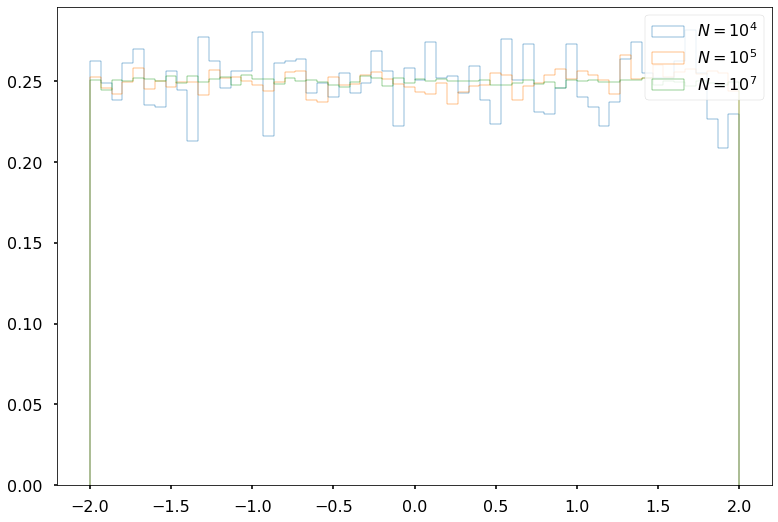

In [14]:
samples = np.random.uniform(-2,2,10000)
samples1 = np.random.uniform(-2,2,100000)
samples2 = np.random.uniform(-2,2,1000000)
plt.hist(samples, bins=60, histtype='step', label="$N=10^4$", density=True)
plt.hist(samples1, bins=60, histtype='step', label="$N=10^5$", density=True)
plt.hist(samples2, bins=60, histtype='step', label="$N=10^7$", density=True)
plt.legend(loc='best');

# Definición de algunos indicadores estadísticos

Para un función distribución $f(x)$ se definen los siguientes indicadores estadísticos

1. Promedio aritmético 
$$\mu = \int_{-\infty}^{\infty}xf(x)dx$$

2. Varianza  
$$V = \int_{-\infty}^{\infty}(x-\mu)^2f(x)dx$$

3. Desviación estándar
$$ \sigma = \sqrt{V}$$

4. Skewness
$$ \Sigma = \int_{-\infty}^{\infty}\left(\frac{x-\mu}{\sigma}\right)^3f(x)dx$$

5. Kurtosis
$$ K = \int_{-\infty}^{\infty}\left(\frac{x-\mu}{\sigma}\right)^4f(x)dx - 3$$

# Valores de $\Sigma$ y $K$ para algunas distribuciones

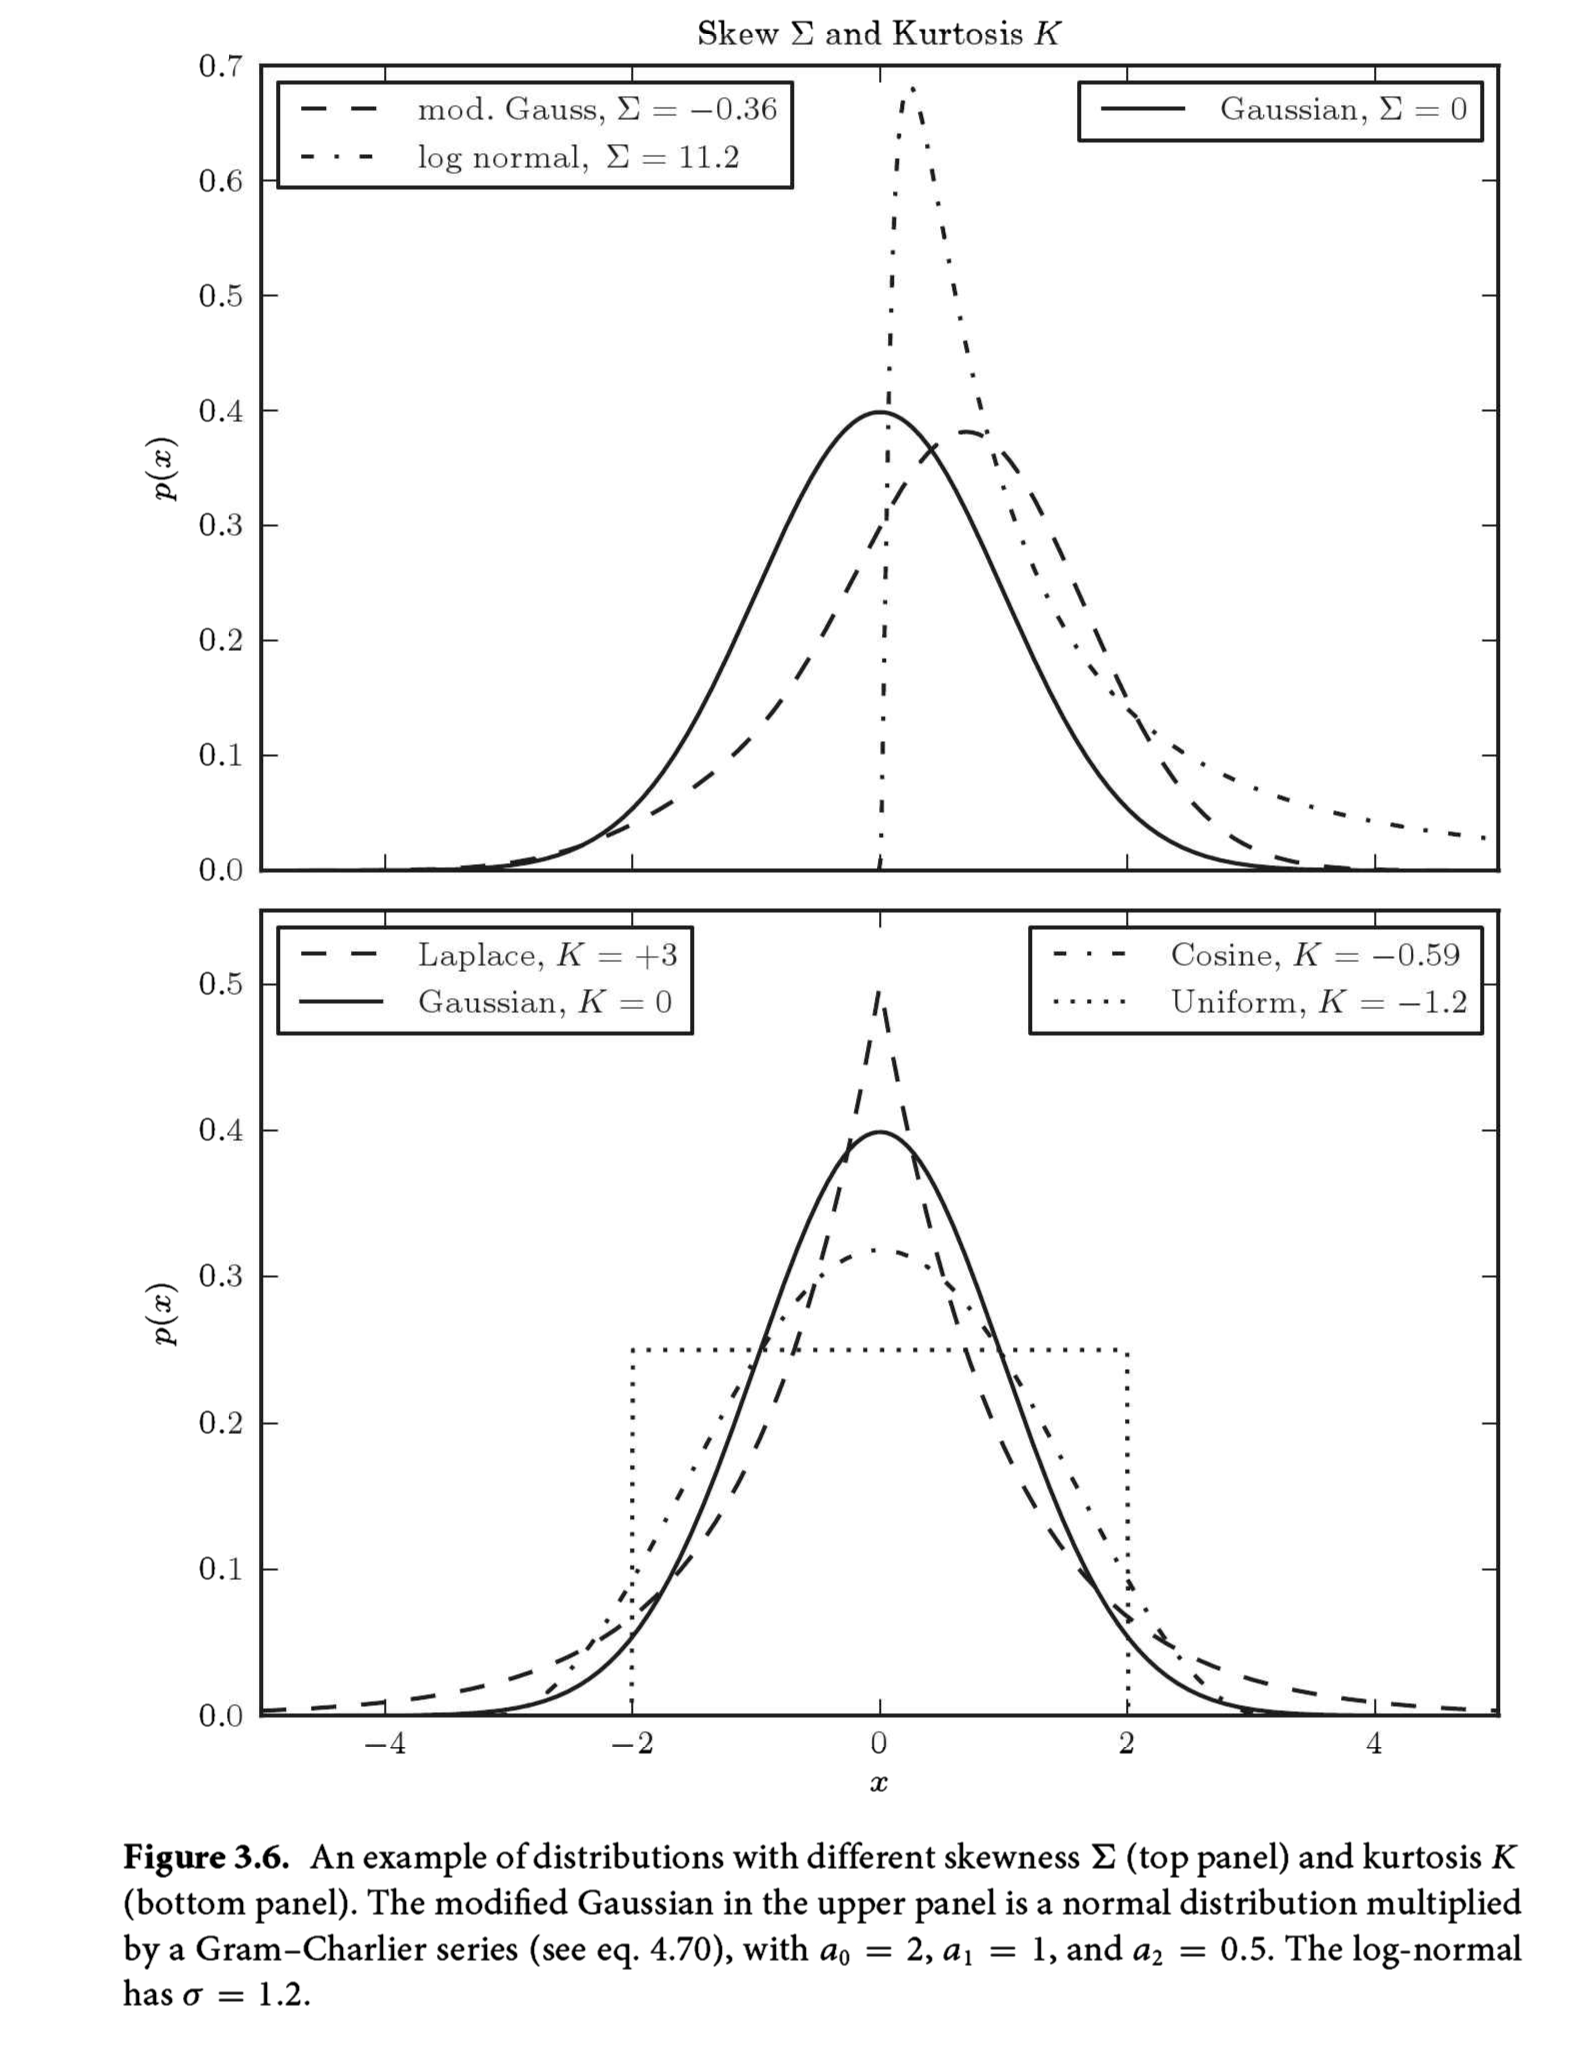

In [15]:
Image("distribuciones.png",width=500)

Valores de algunos indicadores estadísticos para una distribución uniforme de números aleatorios

In [16]:
mean, var, skew, kurt = stats.uniform.stats(loc=-2,scale=6,moments='mvsk')
print ('promedio =',mean)
print ('varianza =',var)
print ('skewness =',skew)
print ('kurtosis =',kurt)

promedio = 1.0
varianza = 3.0
skewness = 0.0
kurtosis = -1.2


# Distribución Gaussiana

Una distribución de números aleatorios con distribución de probabilidad Gaussiana está dada por

$$
p(x|\mu,\sigma) = \frac{1}{\sigma\sqrt{2\pi}} \exp\left(\frac{-(x-\mu)^2}{2\sigma^2}\right) 
$$

Generemos una distribución normal con $\sigma=2$ $\mu=0$.

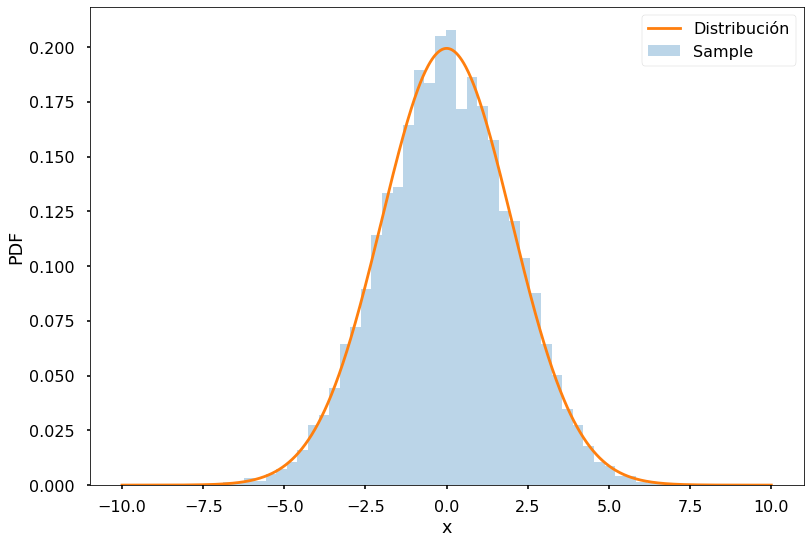

In [17]:
samples = np.random.normal(loc=0,scale=2,size=10000)
x = np.linspace(-10, 10, 1000)
pdf = stats.norm.pdf(x,loc=0,scale=2) # Genera una función distribución Gaussiana 
plt.hist(samples, bins=50, histtype='stepfilled', label="Sample", density=True, alpha=0.3)
plt.plot(x, pdf, label="Distribución")
plt.xlabel('x')
plt.ylabel('PDF')
plt.legend();

A medida que el número generado de valores aleatorios aumenta, su distribución se hace cada vez más cercana a la distribución teórica

Valores de algunos indicadores estadísticos para esta distribución Gaussiana

In [18]:
mean, var, skew, kurt = stats.norm.stats(loc=1.0,scale=2.0,moments='mvsk')
print ('promedio =',mean)
print ('varianza =',var)
print ('skewness =',skew)
print ('kurtosis =',kurt)

promedio = 1.0
varianza = 4.0
skewness = 0.0
kurtosis = 0.0


Consideremos una distribución de $N$ datos consistente en la superposición de dos distribuciones Gaussianas con 

$N_1=2500$, $\mu_1=0$, $\sigma_1=2$ 

$N_2=2000$, $\mu_2=5$, $\sigma_2=1$

donde $N=N_1+N_2=4500$.

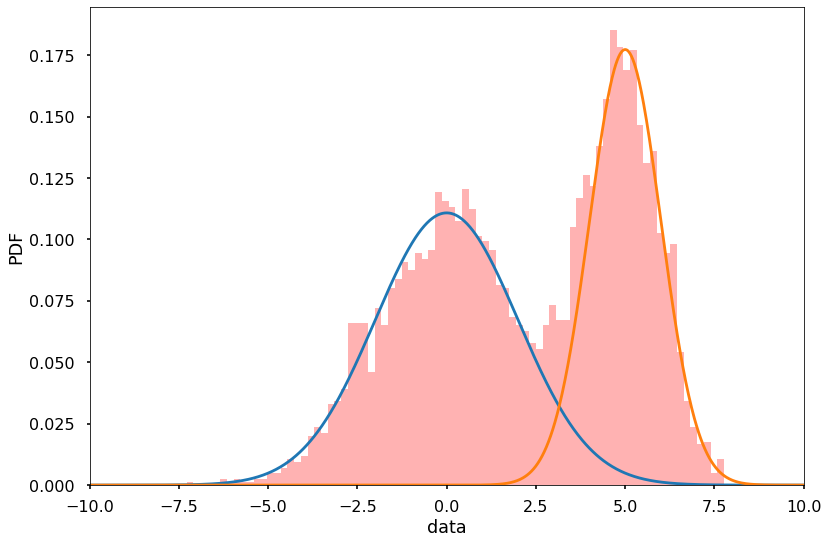

In [19]:
N1 = 2500
N2 = 2000
N = N1 + N2
x1 = np.random.normal(0, 2, N1)
x2 = np.random.normal(5, 1, N2)
data = np.concatenate([x1,x2])
plt.hist(data, 80, density=True, color='red', alpha=0.3, histtype='stepfilled')
x = np.linspace(-10,10,1000)
sigma = 2
mu = 0
plt.plot(x,(N1/N)/(sigma*np.sqrt(2*np.pi))*np.exp(-(x-mu)**2/(2*sigma**2)))
sigma = 1
mu = 5
plt.plot(x,(N2/N)/(sigma*np.sqrt(2*np.pi))*np.exp(-(x-mu)**2/(2*sigma**2)))
plt.xlim(-10, 10)
plt.xlabel('data')
plt.ylabel('PDF');

Ejemplo del efecto de utilizar distintos anchos de los bines en los histogramas. Se aprecian pequeñas diferencias que podrían generar errores en la interpretación de la distribución de datos.

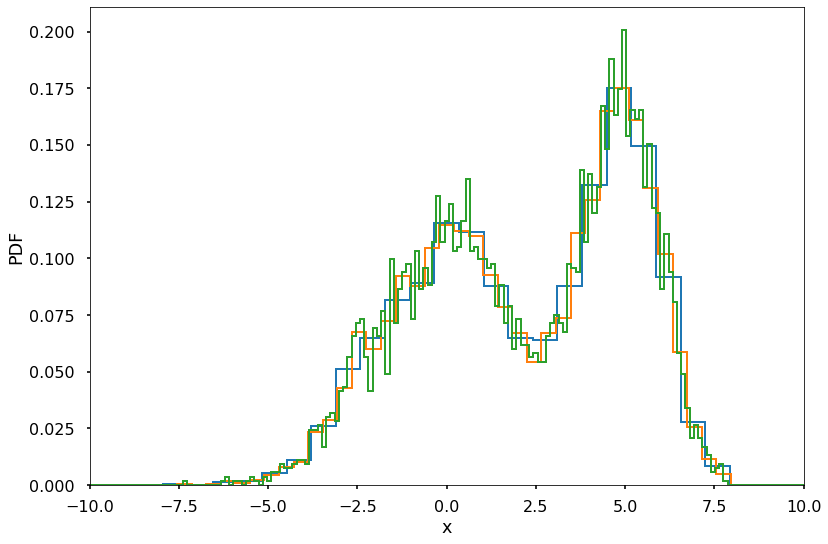

In [20]:
bins = np.linspace(-10,10,30)
plt.hist(data, bins, histtype='step', density=True, lw=2)
bins = np.linspace(-10,10,50)
plt.hist(data, bins, histtype='step', density=True, lw=2)
bins = np.linspace(-10,10,170)
plt.hist(data, bins,  histtype='step', density=True, lw=2)
plt.xlim(-10, 10)
plt.xlabel('x')
plt.ylabel('PDF');

Ejemplo del efecto de utilizar distintos valores iniciales para los bines en los histogramas. Al igual que en el caso anterior, se observan pequeñas diferencias que podrían generar errores en la interpretación de la distribución de datos.

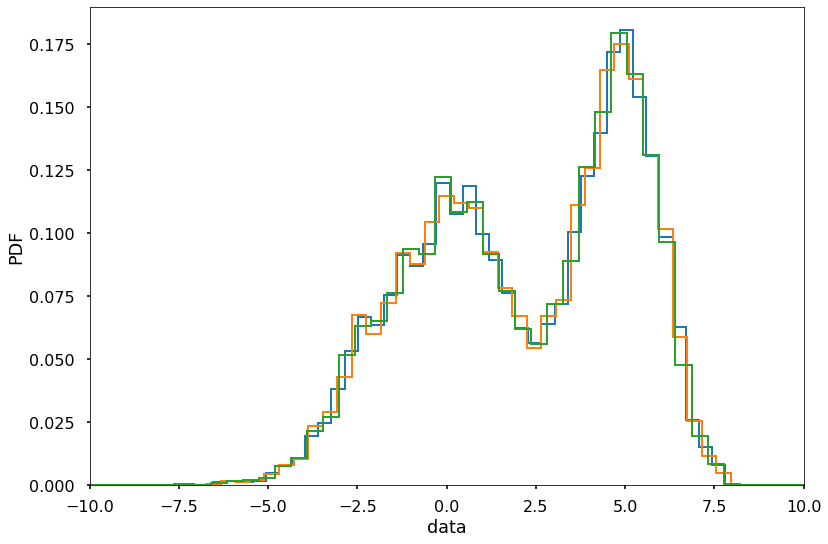

In [21]:
bins = np.linspace(-8,10,50)
plt.hist(data, bins, histtype='step', density=True, lw=2)
bins = np.linspace(-10,10,50)
plt.hist(data, bins, histtype='step', density=True, lw=2)
bins = np.linspace(-12,10,50)
plt.hist(data, bins,  histtype='step', density=True, lw=2)
plt.xlim(-10, 10)
plt.xlabel('data')
plt.ylabel('PDF');